# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [251]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [252]:
import numpy as np

n = len(x)

In [253]:
def design_matrix(m):
    
    A = np.zeros((n, m+1)) 
    
    for i in range(n):
        for j in range(m+1):
            A[i,j] = x[i]**j
    return A

In [254]:
design_matrix(2)

array([[ 1.    , -1.    ,  1.    ],
       [ 1.    , -0.7   ,  0.49  ],
       [ 1.    , -0.43  ,  0.1849],
       [ 1.    , -0.14  ,  0.0196],
       [ 1.    , -0.14  ,  0.0196],
       [ 1.    ,  0.43  ,  0.1849],
       [ 1.    ,  0.71  ,  0.5041],
       [ 1.    ,  1.    ,  1.    ],
       [ 1.    ,  1.29  ,  1.6641],
       [ 1.    ,  1.57  ,  2.4649],
       [ 1.    ,  1.86  ,  3.4596],
       [ 1.    ,  2.14  ,  4.5796],
       [ 1.    ,  2.43  ,  5.9049],
       [ 1.    ,  2.71  ,  7.3441],
       [ 1.    ,  3.    ,  9.    ]])

It seems to be ok.

The normal equations:
$$
A^TA \vec{\beta} = A^T\vec{y},
$$
where $\vec{\beta}$ is a vector of coefficients of $P_m(x)$.

In [255]:
def coeff_b(m):
    
    A = design_matrix(m)

    A_T_A = A.T@A
    A_T_y = A.T@y
    
    b = np.linalg.solve(A_T_A, A_T_y)
    return np.flip(b) #нулевой элемент - коэфф. при старшей степени

In [256]:
for i in range(3):
    b = coeff_b(i)
    print('m =', i, ':  b =', b)

m = 0 :  b = [0.79066667]
m = 1 :  b = [ 1.46502399 -0.6479869 ]
m = 2 :  b = [ 1.0667959  -0.65313865 -1.25772058]


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [257]:
def sigma(m):
    
    g = 0
    
    for k in range(n):
        g += (np.polyval(coeff_b(m), x[k]) - y[k])**2
        
    g = (g/(n-m))**2 #хотим sigma, а не sigma**2
    
    return g

Text(0, 0.5, 'sigma')

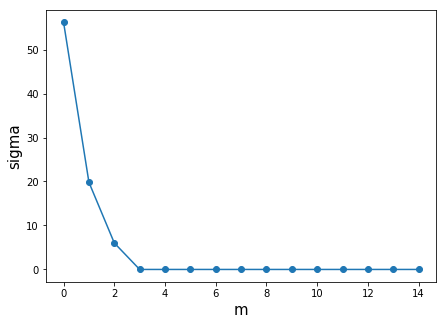

In [283]:
import matplotlib.pyplot as plt

max_m = n-1 # при m=15 обнуляется знаменатель sigma

s = [sigma(i) for i in range(max_m+1)]

plt.figure(figsize=(7,5))
plt.plot(np.arange(max_m+1), s, '-o')

plt.xlabel('m', fontsize=15)
plt.ylabel('sigma', fontsize=15)

Видим из графика, что $\sigma_m$ стабилизируется примерно при $m = 3$. Найдём оптимальное значение:

In [277]:
def best_m(m): 
    
    best_m = 0
    
    for i in range(m):
        if sigma(i+1) > sigma(i):
            best_m = i
            break
    return best_m

In [275]:
best_m(n)

4

Оказывается, параметр $\sigma_m$ для $m = 4$ меньше, а после $m = 4$ увеличился.

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

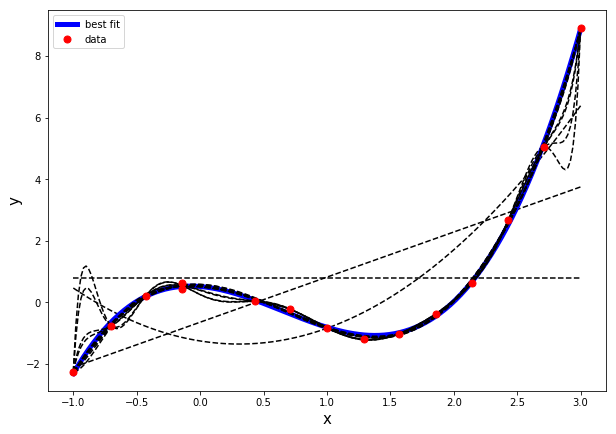

In [299]:
plt.figure(figsize=(10,7))

x0 = np.linspace(-1, 3, 200)

for m in range(len(x)):
    P = np.polyval(coeff_b(m), x0 )
    
    if m == best_m(n):
        plt.plot(x0, P, lw=5, color = 'blue', label='best fit')
    else:
        plt.plot(x0, P, ls='--', color = 'black')
        
plt.plot(x, y, 'o', ms='7', label='data', color='red')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()

Как видим, исходные точки визуально больше напоминают кубическую зависимость, но, вероятно, лучше подгоняются четвёртой степенью из-за двойной точки $x = -0.14$. Ещё видим, что полиномы больших степеней начинают сильно осциллировать.

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [180]:
M = best_m(10)
y_ = y.copy()

Q, R = np.linalg.qr(design_matrix(M))

y_ = np.dot(Q.T, y_)
f = y_[:M+1]

# оказалось, что библиотечная R есть R1 из лекций
b_qr = np.linalg.solve(R, f)

print("The normal system: ", coeff_b(M), "\n The QR factorization: ", b_qr, "\n The difference between them: ", coeff_b(M)-b_qr)

The normal system:  [ 0.49483598 -0.26983377 -2.01973166  1.01540301] 
 The QR factorization:  [ 0.49483598 -0.26983377 -2.01973166  1.01540301] 
 The difference between them:  [ 1.93178806e-14  4.55191440e-15 -3.55271368e-14  1.15463195e-14]


Как видим, значения отличаются. В данном случае на величины порядка 1е-14, но отличаются.

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [374]:
func = lambda t: np.cos(t)*t**2

In [375]:
def lagrange(X, xk, yk):
    
    m = len(xk)
    L = 0
    
    for k in range(m):
        l = 1.0
        for j in range(m):
            if j == k:
                continue
            l *= (X - xk[j])/(xk[k] - xk[j])
        L += yk[k]*l
        
    return L

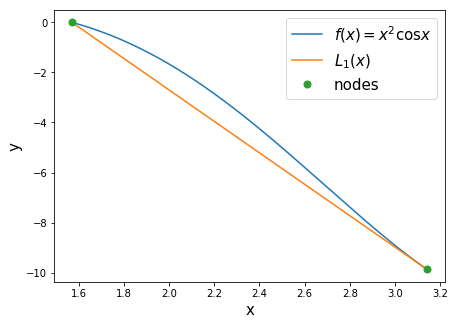

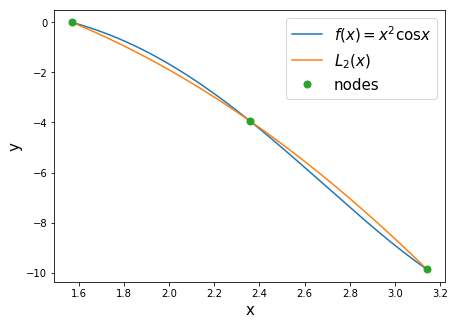

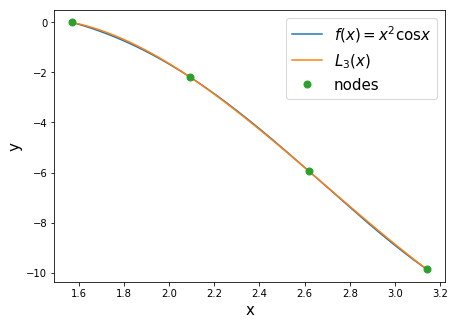

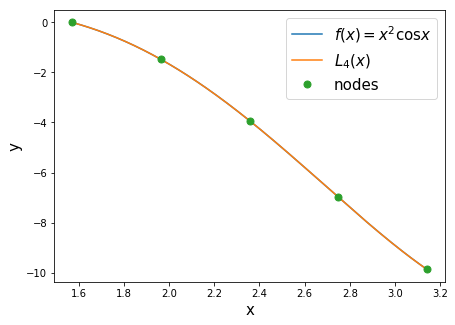

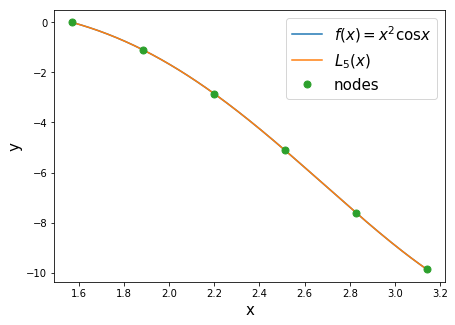

In [396]:
for i in range(2,7):
    
    plt.figure(figsize=(7,5))
    
    xn = np.linspace(np.pi/2, np.pi, 200)
    plt.plot(xn, func(xn), label='$f(x) = x^2 \cos{x}$')
    
    nodes = np.linspace(np.pi/2, np.pi, i)
    yy = func(nodes)
    
    yn = [lagrange(X, nodes, yy) for X in xn]
    plt.plot(xn, yn, label='$L_{%i}(x)$'%(i-1))
    
    plt.plot(nodes, yy, 'o', ms=7, label='nodes')
    plt.legend(fontsize=15)
    
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

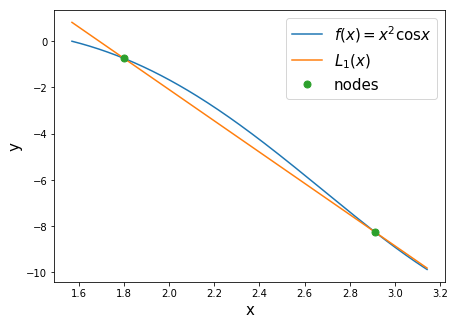

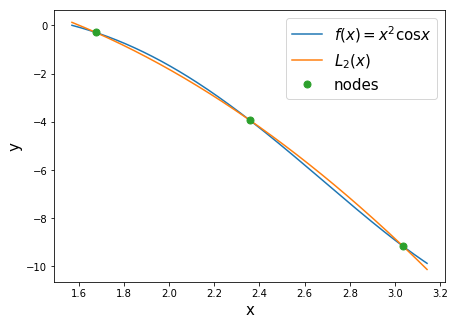

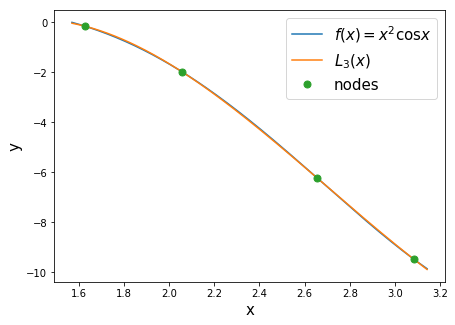

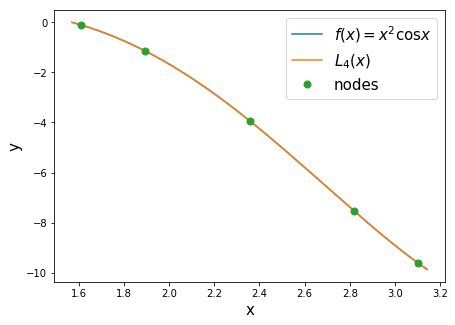

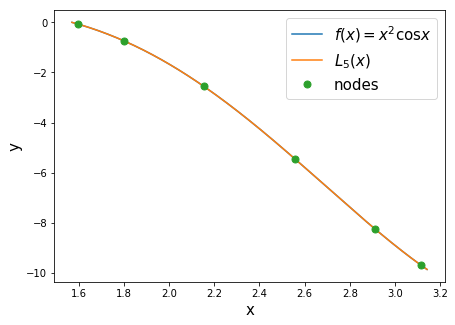

In [397]:
for i in range(2,7):
    
    plt.figure(figsize=(7,5))
    
    xn = np.linspace(np.pi/2, np.pi, 200)
    plt.plot(xn, func(xn), label='$f(x) = x^2 \cos{x}$')
    
    nodes = np.pi/4*np.cos((2*np.arange(i)+1)*np.pi/(2*i))+3*np.pi/4
    yy = func(nodes)
    
    yn = [lagrange(X, nodes, yy) for X in xn]
    plt.plot(xn, yn, label='$L_{%i}(x)$'%(i-1))
    
    plt.plot(nodes, yy, 'o', ms=7, label='nodes')
    plt.legend(fontsize=15)
    
    plt.xlabel('x', fontsize=15)
    plt.ylabel('y', fontsize=15)